In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/My\ Drive/eva-04/S12/* 

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S12/')

SHOW 50 DOWN LOADED DOG IMAGES WITH NAMES 

bearded-collie-1.jpg 680 540
bearded-collie-2.jpg 680 452
bearded-collie-3.jpg 680 453
bearded-collie-4.jpg 680 453
bearded-collie-5.jpg 680 675
bearded-collie-6.jpg 680 386
bearded-collie-7.jpg 680 502
bearded-collie-8.jpg 680 453
bernese-dogs-puppies-2.jpg 680 450
bernese-dogs-2.jpg 680 402
bernese-dogs-puppies-3.jpg 680 489
bernese-dogs-puppies-5.jpg 680 452
bernese-dogs-puppies-4.jpg 680 452
bernese-dogs-puppies-6.jpg 680 465
bernese-dogs-puppies-7.jpg 680 453
bernese-dogs-puppies-8.jpg 680 1012
bernese-mountain-dog-1.jpg 760 430
dutch-shepherd-1.jpg 760 430
dutch-shepherd-2.jpg 760 430
dutch-shepherd-3.jpg 760 430
dutch-shepherd-10.jpg 4820 3213
dutch-shepherd-4.jpg 760 430
dutch-shepherd-7.jpg 760 430
dutch-shepherd-9.jpg 760 430
dutch-shepherd-6.jpg 760 430
dutch-shepherd-5.jpg 760 430
tibetan-mastiff-2.jpg 680 451
tibetan-mastiff-11.jpg 680 453
tibetan-mastiff-10.jpg 680 453
tibetan-mastiff-4.jpg 680 451
tibetan-mastiff-3.jpg 680 453
tibetan-mastiff-5.jpg 680 509
tibetan-mastif

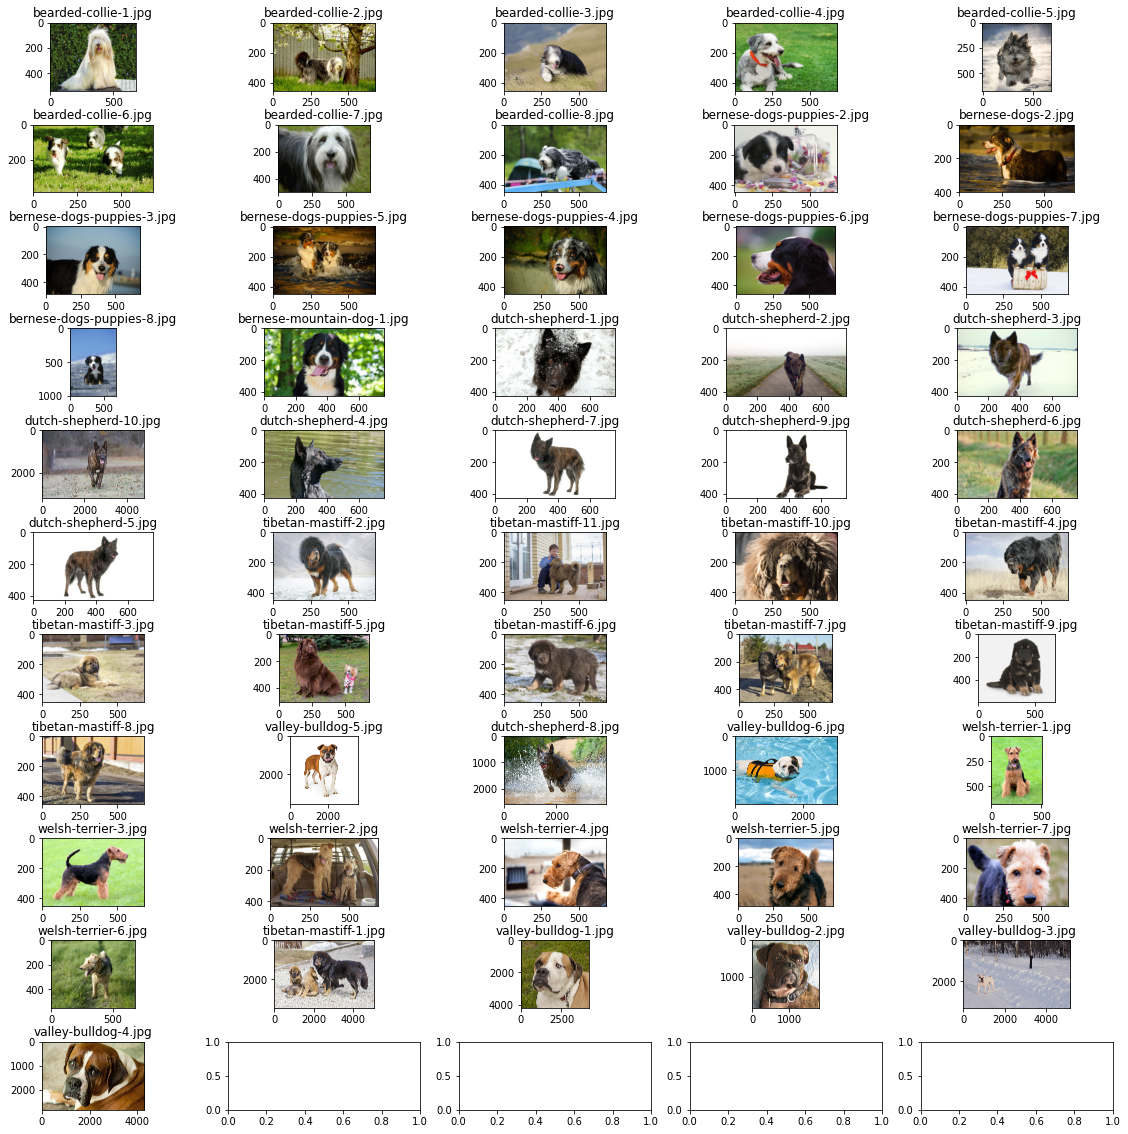

51


In [3]:
#!/usr/bin/python
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)
    return loadedImages

path = "/content/gdrive/My Drive/eva-04/S12/dog_breeds/"

# your images in an array
imgs = loadImages(path)
#print(type(imgs[1]))
import numpy as np
import cv2
from matplotlib import pyplot as plt
map_image_sizes = {}
_, axs = plt.subplots(11, 5, figsize=(20, 20))
axs = axs.flatten()
image_names = []
for img, ax in zip(imgs, axs):
  h, w = img.size
  name = img.filename.split('/')[7]
  #ax.imshow(img)
  ax.imshow(img)
  ax.title.set_text(name) 
  #print(name)
  map_image_sizes[name] = (h,w)
  image_names.append(name)
  print(name,h,w)

plt.subplots_adjust(hspace=0.5)
plt.show()
print(len(image_names))

READ ANNOTATION JSON FILE

In [6]:
import pandas as pd
path_annotations = "/content/gdrive/My Drive/eva-04/S12/S12_regions_export_json.json"

df = pd.read_json(r'/content/gdrive/My Drive/eva-04/S12/S12_regions_export_json.json')
#name
#size
#[{'shape_attributes': {'name': 'rect', 'x': 192, 'y': 37, 'width': 345, 'height': 490}, 'region_attributes': {'name': 'bearded-collie-1', 'type': 'dog', 'image_quality': {'good': True, 'frontal': True, 'good_illumination': True}}}]
#{'caption': '', 'public_domain': 'no', 'image_...

image_names = df.iloc[0][0:50]
#print(image_names[0])
sizes = df.iloc[1][0:50]
#print(attributes)
shape_attributes = df.iloc[2][0:50]
#shape_attributes is array starting with[
#print(shape_attributes)
nc_x_bbox = []
nc_y_bbox = []

n_w_bbox = []
n_h_bbox = []

for idx in range(50):
  shape_attributes = df.iloc[2][0:50]
  map = shape_attributes[0][0] # remove array and take dictionary of json
  x = map['shape_attributes']['x']
  y = map['shape_attributes']['y']
  region_width = map['shape_attributes']['width']
  region_height = map['shape_attributes']['height']
  #normalize 
  image_name = image_names[idx]
  #print(image_name,"-size-",map_image_sizes[image_name][1],'x=',x,'nx=',(x/map_image_sizes[image_name][1]))
  n_x = x/map_image_sizes[image_name][1]
  n_y = y/map_image_sizes[image_name][0]
  n_region_width = region_width / map_image_sizes[image_name][1]
  n_region_height = region_width / map_image_sizes[image_name][0]
  n_w_bbox.append(n_region_width)
  n_h_bbox.append(n_region_height)

  #print(x,y,region_width,region_height, n_x, n_y,n_region_width,n_region_height)
  #map_image_sizes['imagename':(height,width)]
  #print(map_image_sizes.get(image_names[idx])[1]) 
  # Now calculate centrods of the normalized bounding box/region
  nc_x_bbox.append(n_x + (n_region_width/2))
  nc_y_bbox.append(n_y + (n_region_height/2)) 

print("Normalized:Centroids:X,Y Lists")

print(nc_x_bbox)
print(nc_y_bbox) 
print("Normalized::Width,Height Lists")

print(n_w_bbox)
print(n_h_bbox) 
 

Normalized:Centroids:X,Y Lists
[0.675, 0.8064159292035398, 0.804635761589404, 0.804635761589404, 0.54, 0.944300518134715, 0.7260956175298805, 0.804635761589404, 0.9067164179104478, 0.81, 0.745398773006135, 0.8064159292035398, 0.8064159292035398, 0.7838709677419355, 0.804635761589404, 0.3601778656126482, 0.8476744186046512, 0.8476744186046512, 0.8476744186046512, 0.8476744186046512, 0.8476744186046512, 0.8476744186046512, 0.8476744186046512, 0.8476744186046512, 0.140625, 0.8476744186046512, 0.1134453781512605, 0.10492227979274611, 0.8082039911308204, 0.804635761589404, 0.8082039911308204, 0.7161100196463654, 0.804635761589404, 0.7363636363636363, 0.804635761589404, 0.6105527638190955, 0.804635761589404, 0.804635761589404, 0.08678571428571429, 0.1962843295638126, 0.11126373626373626, 0.12798455056179775, 0.10147550111358575, 0.18225, 0.5360294117647059, 0.8496503496503496, 0.804635761589404, 0.804635761589404, 0.75, 0.659132007233273]
[0.30808823529411766, 0.30808823529411766, 0.30808823

FIND CLUSTERS FROM NORMALIZED WIDTH AND HEIGHT

Cluster Centers: [[0.56348201 0.32520425]
 [0.1294485  0.057884  ]
 [0.81383501 0.299749  ]]


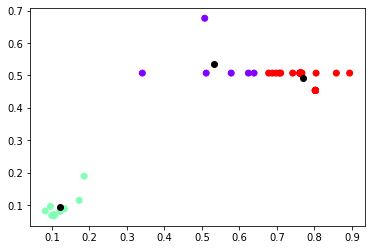

In [10]:
import pandas as pd

df1 = pd.DataFrame({
    'x': n_w_bbox,
    'y': n_h_bbox
})

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df1)
print("Cluster Centers:",kmeans.cluster_centers_)

plt.scatter(n_w_bbox,n_h_bbox, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans1.cluster_centers_[:,0] ,kmeans1.cluster_centers_[:,1], color='black')

K MEANS ALGORITHM - FIND CLUSTERS FROM CENTROIDS

Cluster Centers: [[0.81383501 0.299749  ]
 [0.1294485  0.057884  ]
 [0.56348201 0.32520425]]


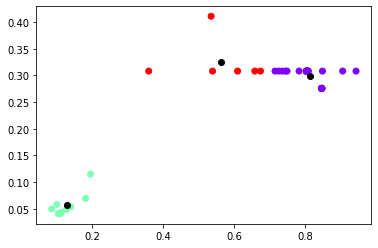

In [11]:
import pandas as pd

df = pd.DataFrame({
    'x': nc_x_bbox,
    'y': nc_y_bbox
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
print("Cluster Centers:",kmeans.cluster_centers_)

plt.scatter(nc_x_bbox,nc_y_bbox, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

USING ELBOW METHOD: FIND NUMBER OF CLUSTERS USING DISTORTION AND INERTIA

In [0]:
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X = np.array(list(zip(n_w_bbox, n_h_bbox))).reshape(len(n_w_bbox), 2)   
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

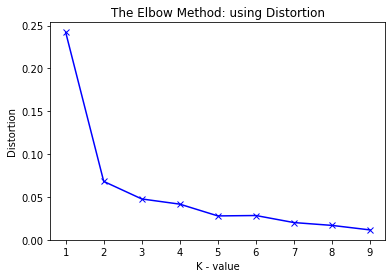

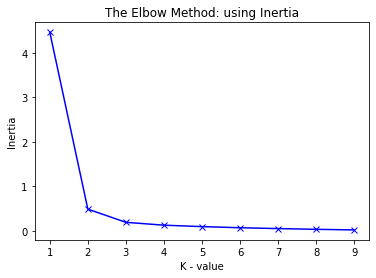

In [24]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K - value') 
plt.ylabel('Distortion value') 
plt.title('The Elbow Method: using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('K - value') 
plt.ylabel('Inertia value') 
plt.title('The Elbow Method: using Inertia') 
plt.show()

WE CAN CONCLUDE THAT FROM K=3, DISTORTION AND INERTIA START DECREAING. 